In [1262]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

color_pal = sns.color_palette()


In [1263]:
label_set = labels_set = 'Data/header_descriptions.csv'
labels = pd.read_csv(labels_set)

In [1264]:
scans_df = pd.read_parquet('Data/Drought_Monitor_DSCI_Datasets/Tift_County_Scans_2000-2021.parquet')


In [1265]:
dsci_df = pd.read_csv('Data/Drought_Monitor_DSCI_Datasets/Tift_County_DSCI_2000_2001.csv')
dsci_df.head(5)

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20211228,13277,Tift County,GA,16.66,83.34,0.0,0.0,0.0,0.0,2021-12-28,2022-01-03,1
1,20211221,13277,Tift County,GA,45.27,54.73,0.0,0.0,0.0,0.0,2021-12-21,2021-12-27,1
2,20211214,13277,Tift County,GA,0.00,100.00,0.0,0.0,0.0,0.0,2021-12-14,2021-12-20,1
3,20211207,13277,Tift County,GA,0.00,100.00,0.0,0.0,0.0,0.0,2021-12-07,2021-12-13,1
4,20211130,13277,Tift County,GA,96.75,3.25,0.0,0.0,0.0,0.0,2021-11-30,2021-12-06,1


In [1266]:
dsci_df.dtypes

MapDate                int64
FIPS                   int64
County                object
State                 object
None                 float64
D0                   float64
D1                   float64
D2                   float64
D3                   float64
D4                   float64
ValidStart            object
ValidEnd              object
StatisticFormatID      int64
dtype: object

In [1267]:
dsci_df['date'] = pd.to_datetime(dsci_df['MapDate'], infer_datetime_format=False, format="%Y%m%d")

In [1268]:
dsci_df

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,date
0,20211228,13277,Tift County,GA,16.66,83.34,0.0,0.0,0.0,0.0,2021-12-28,2022-01-03,1,2021-12-28
1,20211221,13277,Tift County,GA,45.27,54.73,0.0,0.0,0.0,0.0,2021-12-21,2021-12-27,1,2021-12-21
2,20211214,13277,Tift County,GA,0.00,100.00,0.0,0.0,0.0,0.0,2021-12-14,2021-12-20,1,2021-12-14
3,20211207,13277,Tift County,GA,0.00,100.00,0.0,0.0,0.0,0.0,2021-12-07,2021-12-13,1,2021-12-07
4,20211130,13277,Tift County,GA,96.75,3.25,0.0,0.0,0.0,0.0,2021-11-30,2021-12-06,1,2021-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,20000201,13277,Tift County,GA,0.00,100.00,100.0,100.0,0.0,0.0,2000-02-01,2000-02-07,1,2000-02-01
1144,20000125,13277,Tift County,GA,0.00,100.00,100.0,100.0,0.0,0.0,2000-01-25,2000-01-31,1,2000-01-25
1145,20000118,13277,Tift County,GA,0.00,100.00,100.0,100.0,0.0,0.0,2000-01-18,2000-01-24,1,2000-01-18
1146,20000111,13277,Tift County,GA,0.00,100.00,100.0,100.0,0.0,0.0,2000-01-11,2000-01-17,1,2000-01-11


In [1269]:
dsci_df = dsci_df.drop(['MapDate', 'FIPS', 'County', 'State', 'StatisticFormatID'], axis=1)
dsci_df = dsci_df.set_index('date')

In [1270]:
dsci_df.drop(['ValidStart', 'ValidEnd'], axis=1)

,None,D0,D1,D2,D3,D4
date,,,,,,
2021-12-28,16.66,83.34,0.0,0.0,0.0,0.0
2021-12-21,45.27,54.73,0.0,0.0,0.0,0.0
2021-12-14,0.00,100.00,0.0,0.0,0.0,0.0
2021-12-07,0.00,100.00,0.0,0.0,0.0,0.0
2021-11-30,96.75,3.25,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2000-02-01,0.00,100.00,100.0,100.0,0.0,0.0
2000-01-25,0.00,100.00,100.0,100.0,0.0,0.0
2000-01-18,0.00,100.00,100.0,100.0,0.0,0.0


In [1271]:
print('Max DSCI Week: ', dsci_df.index.max())
print('Min DSCI Week: ', dsci_df.index.min())

Max DSCI Week:  2021-12-28 00:00:00
Min DSCI Week:  2000-01-04 00:00:00


In [1272]:
scans_df.head(5)

,Site Id,Date,PREC.I-1 (in),TOBS.I-1 (degC),TMAX.D-1 (degC),TMIN.D-1 (degC),TAVG.D-1 (degC),SMS.I-1:-2 (pct) (loam),SMS.I-1:-4 (pct) (loam),SMS.I-1:-8 (pct) (loam),...,SAL.I-5:-40 (gram),RDC.I-1:-2 (unit),RDC.I-1:-4 (unit),RDC.I-1:-8 (unit),RDC.I-1:-20 (unit),RDC.I-5:-40 (unit),BATT.I-1 (volt),BATT.I-2 (volt),WDIRV.D-1 (degr),WSPDV.D-1 (mph)
0,2027,2000-01-01,4.6,16.3,22.6,7.5,14.7,1.8,4.6,7.3,...,0.1,3.3,4.2,5.3,10.51,15.60,12.75,3.16,184.0,2.3
1,2027,2000-01-02,4.7,13.2,22.9,12.3,16.8,2.2,6.8,8.1,...,0.1,3.4,5.1,5.7,10.28,15.40,12.74,3.16,144.0,2.5
2,2027,2000-01-03,4.7,15.1,25.7,9.7,17.0,1.0,5.5,7.0,...,0.1,3.0,4.6,5.2,10.07,15.18,12.72,3.16,180.0,2.1
3,2027,2000-01-04,4.7,16.9,26.0,12.2,19.0,0.8,5.9,8.0,...,0.1,2.9,4.8,5.6,10.19,15.53,12.73,3.16,179.0,3.8
4,2027,2000-01-05,5.0,10.1,23.8,10.0,17.5,3.0,7.8,9.6,...,0.1,3.7,5.5,6.4,9.98,15.42,12.51,3.16,234.0,6.9


In [1273]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday', 'Tuesday',
                                        'Wednesday',
                                        'Thursday', 'Friday',
                                        'Saturday', 'Sunday'],
                            ordered=True)


def create_features(pdf, label=None):
    """
    Creates time series features from datetime index.
    """
    pdf = pdf.copy()
    pdf['date'] = pdf.index
    pdf['hour'] = pdf['date'].dt.hour
    pdf['dayofweek'] = pdf['date'].dt.dayofweek
    pdf['weekday'] = pdf['date'].dt.day_name()
    pdf['weekday'] = pdf['weekday'].astype(cat_type)
    pdf['quarter'] = pdf['date'].dt.quarter
    pdf['month'] = pdf['date'].dt.month
    pdf['year'] = pdf['date'].dt.year
    pdf['dayofyear'] = pdf['date'].dt.dayofyear
    pdf['dayofmonth'] = pdf['date'].dt.day
    pdf['weekofyear'] = pdf['date'].dt.weekofyear
    pdf['date_offset'] = (pdf.date.dt.month * 100 + pdf.date.dt.day - 320) % 1300
    pdf['week'] = pdf.index.week

    pdf['season'] = pd.cut(pdf['date_offset'], [0, 300, 602, 900, 1300],
                           labels=['Spring', 'Summer', 'Fall', 'Winter']
                           )
    return pdf

In [1274]:
scans_df['date'] = pd.to_datetime(scans_df['Date'])
scans_df = scans_df.set_index('date')
# scans_df = create_features(scans_df)
scans_df.head(5)

,Site Id,Date,PREC.I-1 (in),TOBS.I-1 (degC),TMAX.D-1 (degC),TMIN.D-1 (degC),TAVG.D-1 (degC),SMS.I-1:-2 (pct) (loam),SMS.I-1:-4 (pct) (loam),SMS.I-1:-8 (pct) (loam),...,SAL.I-5:-40 (gram),RDC.I-1:-2 (unit),RDC.I-1:-4 (unit),RDC.I-1:-8 (unit),RDC.I-1:-20 (unit),RDC.I-5:-40 (unit),BATT.I-1 (volt),BATT.I-2 (volt),WDIRV.D-1 (degr),WSPDV.D-1 (mph)
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,2027,2000-01-01,4.6,16.3,22.6,7.5,14.7,1.8,4.6,7.3,...,0.1,3.3,4.2,5.3,10.51,15.60,12.75,3.16,184.0,2.3
2000-01-02,2027,2000-01-02,4.7,13.2,22.9,12.3,16.8,2.2,6.8,8.1,...,0.1,3.4,5.1,5.7,10.28,15.40,12.74,3.16,144.0,2.5
2000-01-03,2027,2000-01-03,4.7,15.1,25.7,9.7,17.0,1.0,5.5,7.0,...,0.1,3.0,4.6,5.2,10.07,15.18,12.72,3.16,180.0,2.1
2000-01-04,2027,2000-01-04,4.7,16.9,26.0,12.2,19.0,0.8,5.9,8.0,...,0.1,2.9,4.8,5.6,10.19,15.53,12.73,3.16,179.0,3.8
2000-01-05,2027,2000-01-05,5.0,10.1,23.8,10.0,17.5,3.0,7.8,9.6,...,0.1,3.7,5.5,6.4,9.98,15.42,12.51,3.16,234.0,6.9


In [1275]:
scans_df.index.year.value_counts()

2000    367
2012    367
2020    367
2004    367
2008    367
2019    366
2018    366
2017    366
2016    366
2015    366
2014    366
2013    366
2011    366
2001    366
2010    366
2009    366
2007    366
2006    366
2005    366
2003    366
2002    366
2021    366
Name: date, dtype: int64

In [1276]:
def get_dup_subset(dFrame):
    return dFrame.loc[dFrame.duplicated(subset=['Date'], keep=False), :]


print(f'Duplicated Days: {get_dup_subset(scans_df).shape[0]}')

Duplicated Days: 44


In [1277]:
scans_df = scans_df.drop_duplicates(subset=['Date'])

In [1278]:
print(f'Duplicated Days: {get_dup_subset(scans_df).shape[0]}')

Duplicated Days: 0


In [1279]:
def custom_labeler(dFrame):
    labels.drop([0], inplace=True)
    colsMap = {}

    def labelGen(label):
        row = labels.loc[labels['Label'] == label, :].iloc[0]
        temp = f'{row.Element} {row["Sensor Height"]} ({row.Unit})'
        temp = temp.replace('nan', '')
        return temp.strip()

    cols_string = ",".join(dFrame.columns[1:])
    replacements = ['(degC)', '(pct)', '(loam)', '(gram)', '(unit)', '(volt)', '(degr)', '(in)', '(mph)']
    for i in replacements:
        cols_string = cols_string.replace(i, '')

    cols_list = [i.strip() for i in cols_string.split(',')]

    zipped_cols = dict(zip(list(dFrame.columns[1:]), cols_list))

    for i in list(labels.Label):
        colsMap[i] = labelGen(i)

    return dFrame.rename(columns=zipped_cols).rename(columns=colsMap)

In [1280]:
labeled_df = custom_labeler(scans_df.copy())

In [1281]:
# We do neet to worry about Battery power of the SCAN system nor the site id let's drop those columns
labeled_df = labeled_df.drop(['Site Id', 'Battery  (Volt)', 'Battery  (Volt)', 'Real Dielectric Constant -2" (Unit)',
                              'Real Dielectric Constant -4" (Unit)', 'Real Dielectric Constant -8" (Unit)',
                              'Real Dielectric Constant -20" (Unit)', 'Real Dielectric Constant -40" (Unit)'], axis=1)
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2000-01-01 to 2021-12-31
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   8035 non-null   object 
 1   Precipitation Accumulation  (In)       7380 non-null   float64
 2   Air Temperature Observed  (Degc)       7937 non-null   float64
 3   Air Temperature Maximum  (Degc)        7921 non-null   float64
 4   Air Temperature Minimum  (Degc)        7917 non-null   float64
 5   Air Temperature Average  (Degc)        7919 non-null   float64
 6   Soil Moisture Percent -2" (Pct)        7832 non-null   float64
 7   Soil Moisture Percent -4" (Pct)        7560 non-null   float64
 8   Soil Moisture Percent -8" (Pct)        7195 non-null   float64
 9   Soil Moisture Percent -20" (Pct)       7844 non-null   float64
 10  Soil Moisture Percent -40" (Pct)       7436 non-null  

<AxesSubplot:>

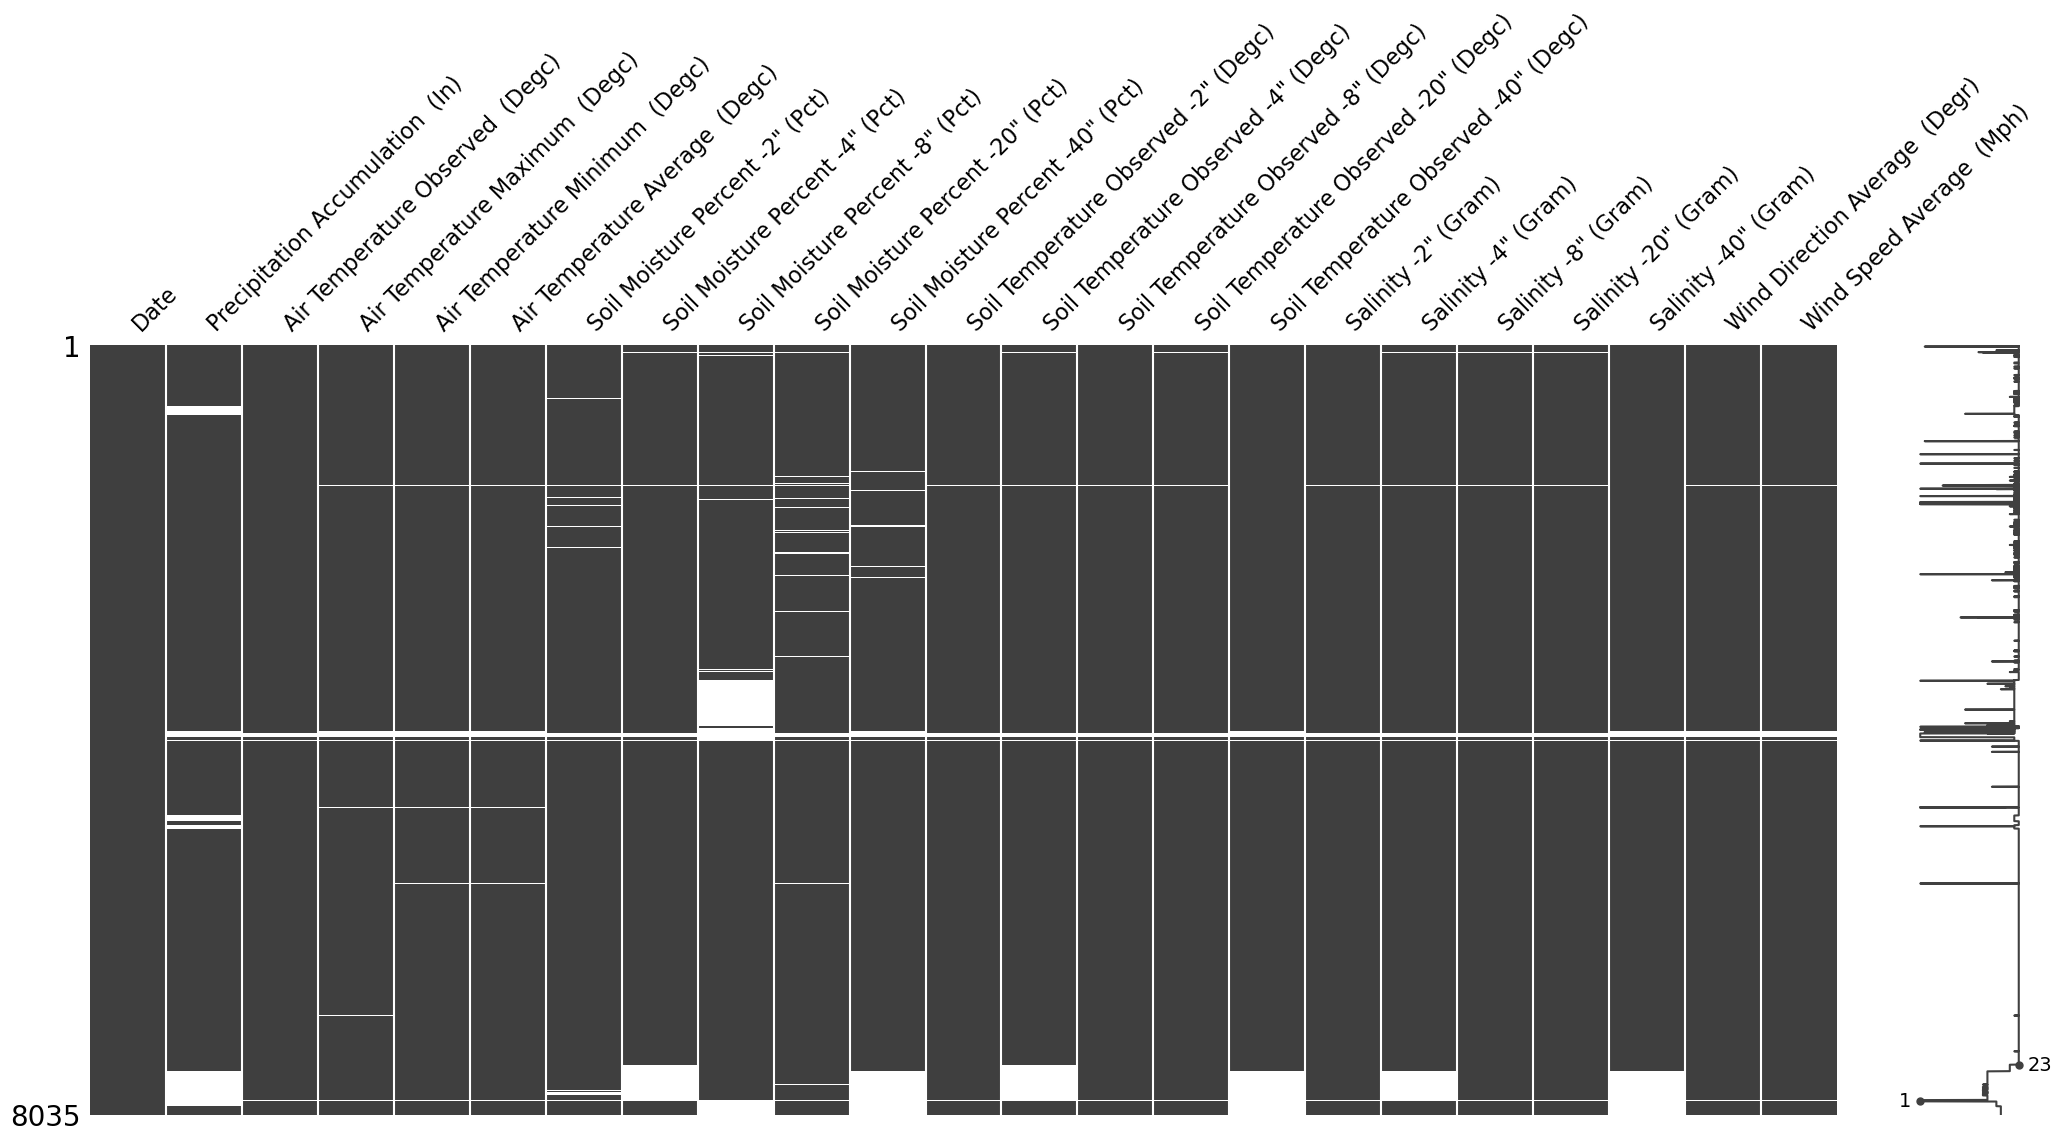

In [1282]:
msno.matrix(labeled_df)

In [1283]:
labeled_df.columns

Index(['Date', 'Precipitation Accumulation  (In)',
       'Air Temperature Observed  (Degc)', 'Air Temperature Maximum  (Degc)',
       'Air Temperature Minimum  (Degc)', 'Air Temperature Average  (Degc)',
       'Soil Moisture Percent -2" (Pct)', 'Soil Moisture Percent -4" (Pct)',
       'Soil Moisture Percent -8" (Pct)', 'Soil Moisture Percent -20" (Pct)',
       'Soil Moisture Percent -40" (Pct)',
       'Soil Temperature Observed -2" (Degc)',
       'Soil Temperature Observed -4" (Degc)',
       'Soil Temperature Observed -8" (Degc)',
       'Soil Temperature Observed -20" (Degc)',
       'Soil Temperature Observed -40" (Degc)', 'Salinity -2" (Gram)',
       'Salinity -4" (Gram)', 'Salinity -8" (Gram)', 'Salinity -20" (Gram)',
       'Salinity -40" (Gram)', 'Wind Direction Average  (Degr)',
       'Wind Speed Average  (Mph)'],
      dtype='object')

In [1284]:
def rename_labeled_df(pdf):
    pdf = pdf.copy()
    pdf = pdf.rename({'Soil Moisture Percent -2" (Pct)': 'smp_2',
                      'Soil Moisture Percent -4" (Pct)': 'smp_4',
                      'Soil Moisture Percent -8" (Pct)': 'smp_8',
                      'Soil Moisture Percent -20" (Pct)': 'smp_20',
                      'Soil Moisture Percent -40" (Pct)': 'smp_40',
                      'Air Temperature Average  (Degc)': 'air_temp_avg',
                      'Air Temperature Observed  (Degc)': 'air_temp_observed',
                      'Air Temperature Maximum  (Degc)': 'air_temp_max',
                      'Air Temperature Minimum  (Degc)' : 'air_temp_min',
                      'Soil Temperature Observed -2" (Degc)': 'soil_temp_2',
                      'Soil Temperature Observed -4" (Degc)': 'soil_temp_4',
                      'Soil Temperature Observed -8" (Degc)': 'soil_temp_8',
                      'Soil Temperature Observed -20" (Degc)': 'soil_temp_20',
                      'Soil Temperature Observed -40" (Degc)': 'soil_temp_40',
                      'Precipitation Accumulation  (In)': 'prcp_accum',
                      'Wind Direction Average  (Degr)': 'wind_dir_avg',
                      'Wind Speed Average  (Mph)': 'wind_speed_avg'}, axis=1)


    pdf['soil_temp_avg'] = pdf[[i for i in list(pdf.columns) if 'soil_temp' in i]].agg('mean', axis=1)
    pdf['smp_avg'] = pdf[[i for i in list(pdf.columns) if 'smp' in i]].agg('mean', axis=1)

    return pdf

In [1285]:
labeled_df = rename_labeled_df(labeled_df)

In [1286]:
labeled_df.head(5)

,Date,prcp_accum,air_temp_observed,air_temp_max,air_temp_min,air_temp_avg,smp_2,smp_4,smp_8,smp_20,...,soil_temp_40,"Salinity -2"" (Gram)","Salinity -4"" (Gram)","Salinity -8"" (Gram)","Salinity -20"" (Gram)","Salinity -40"" (Gram)",wind_dir_avg,wind_speed_avg,soil_temp_avg,smp_avg
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,2000-01-01,4.6,16.3,22.6,7.5,14.7,1.8,4.6,7.3,17.4,...,14.3,0.0,0.1,0.1,0.1,0.1,184.0,2.3,13.44,11.26
2000-01-02,2000-01-02,4.7,13.2,22.9,12.3,16.8,2.2,6.8,8.1,17.1,...,14.6,0.1,0.0,0.0,0.1,0.1,144.0,2.5,13.84,11.82
2000-01-03,2000-01-03,4.7,15.1,25.7,9.7,17.0,1.0,5.5,7.0,16.7,...,14.9,0.1,0.1,0.1,0.1,0.1,180.0,2.1,14.52,10.96
2000-01-04,2000-01-04,4.7,16.9,26.0,12.2,19.0,0.8,5.9,8.0,16.9,...,15.3,0.1,0.0,0.0,0.1,0.1,179.0,3.8,15.28,11.34
2000-01-05,2000-01-05,5.0,10.1,23.8,10.0,17.5,3.0,7.8,9.6,16.5,...,15.6,0.1,0.1,0.1,0.1,0.1,234.0,6.9,14.10,12.36


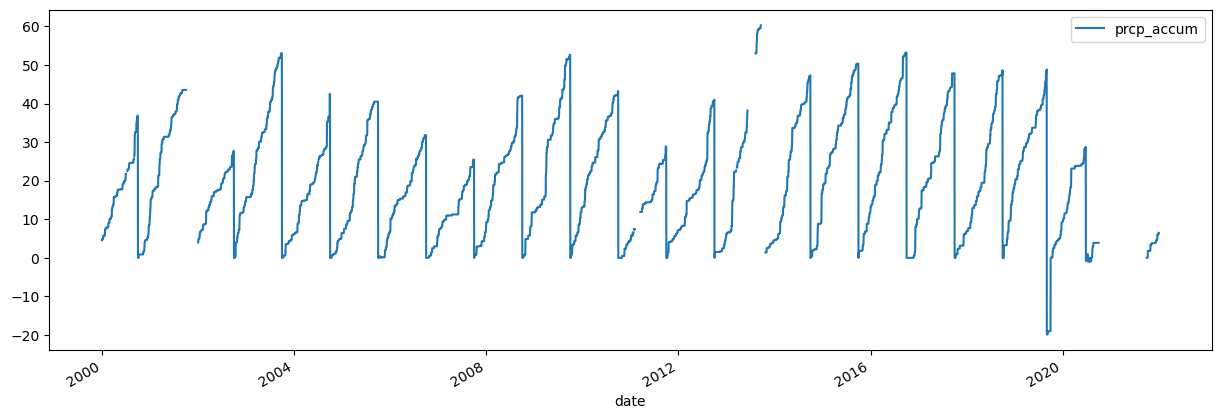

In [1287]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = labeled_df[['prcp_accum']].plot(ax=ax)

<AxesSubplot:>

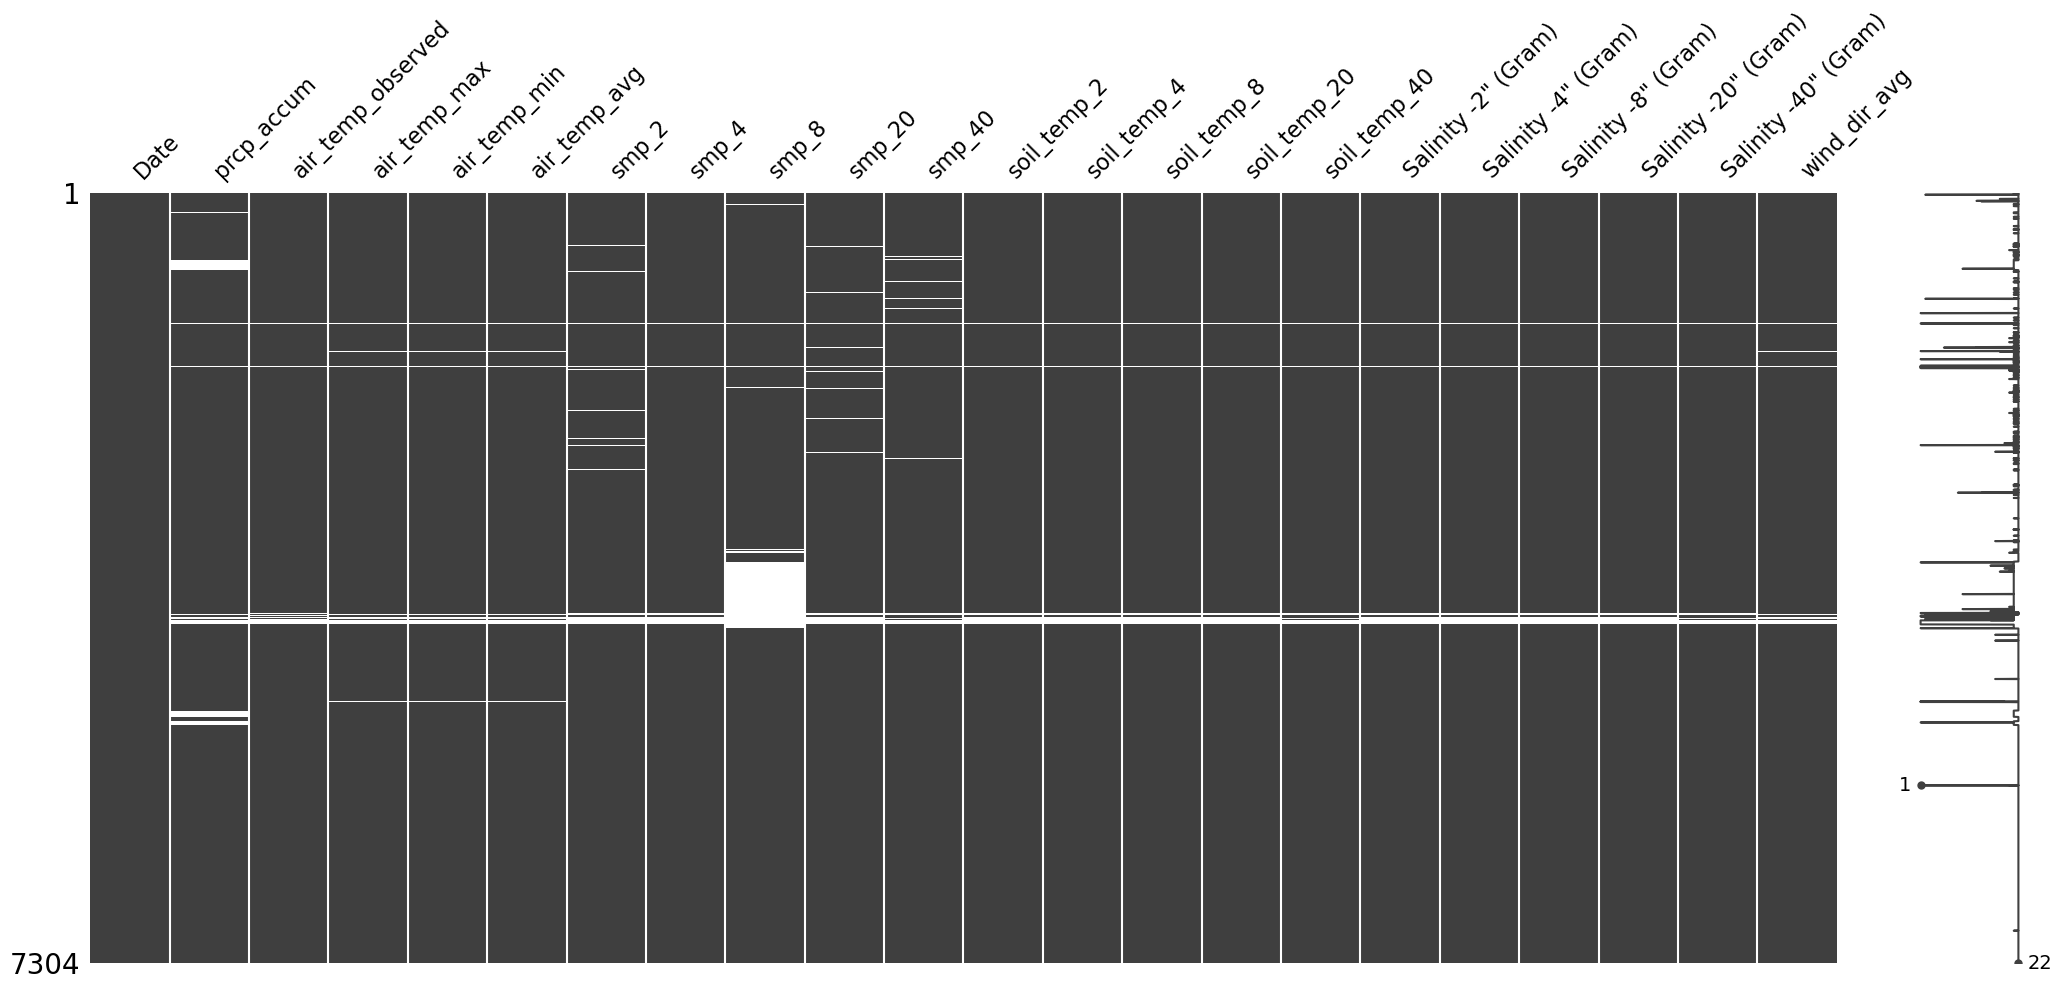

In [1288]:
labeled_df = labeled_df['2000-01-01':'2019-12-31']
# labeled_df = labeled_df.fillna(method='ffill')
msno.matrix(labeled_df.drop(labeled_df.iloc[:, 22:35], axis=1))

In [1289]:
labeled_df = labeled_df.loc[labeled_df["prcp_accum"] >= 0]

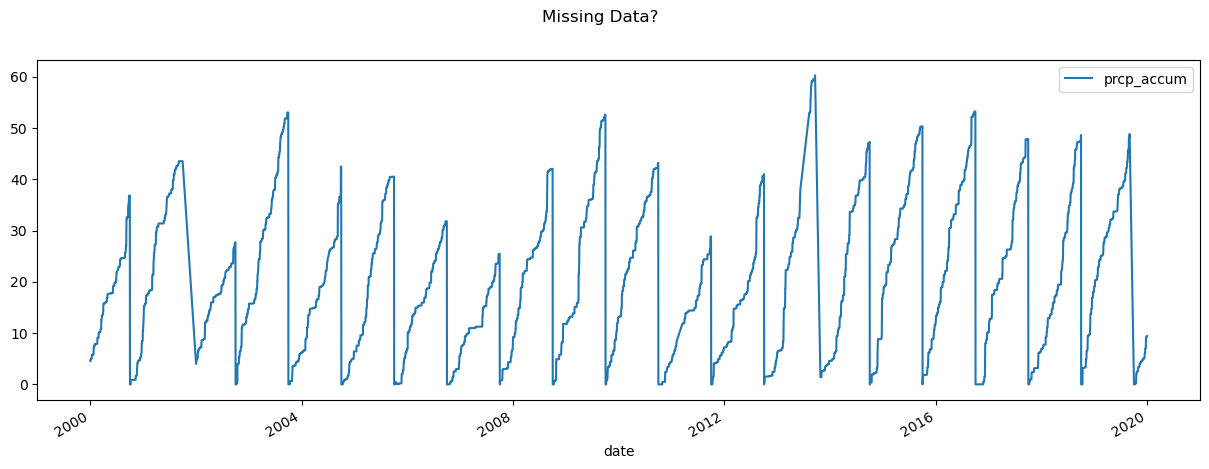

In [1290]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = labeled_df[['prcp_accum']].plot(ax=ax,
                                              style='-')

plot = plt.suptitle('Missing Data?')

<AxesSubplot:>

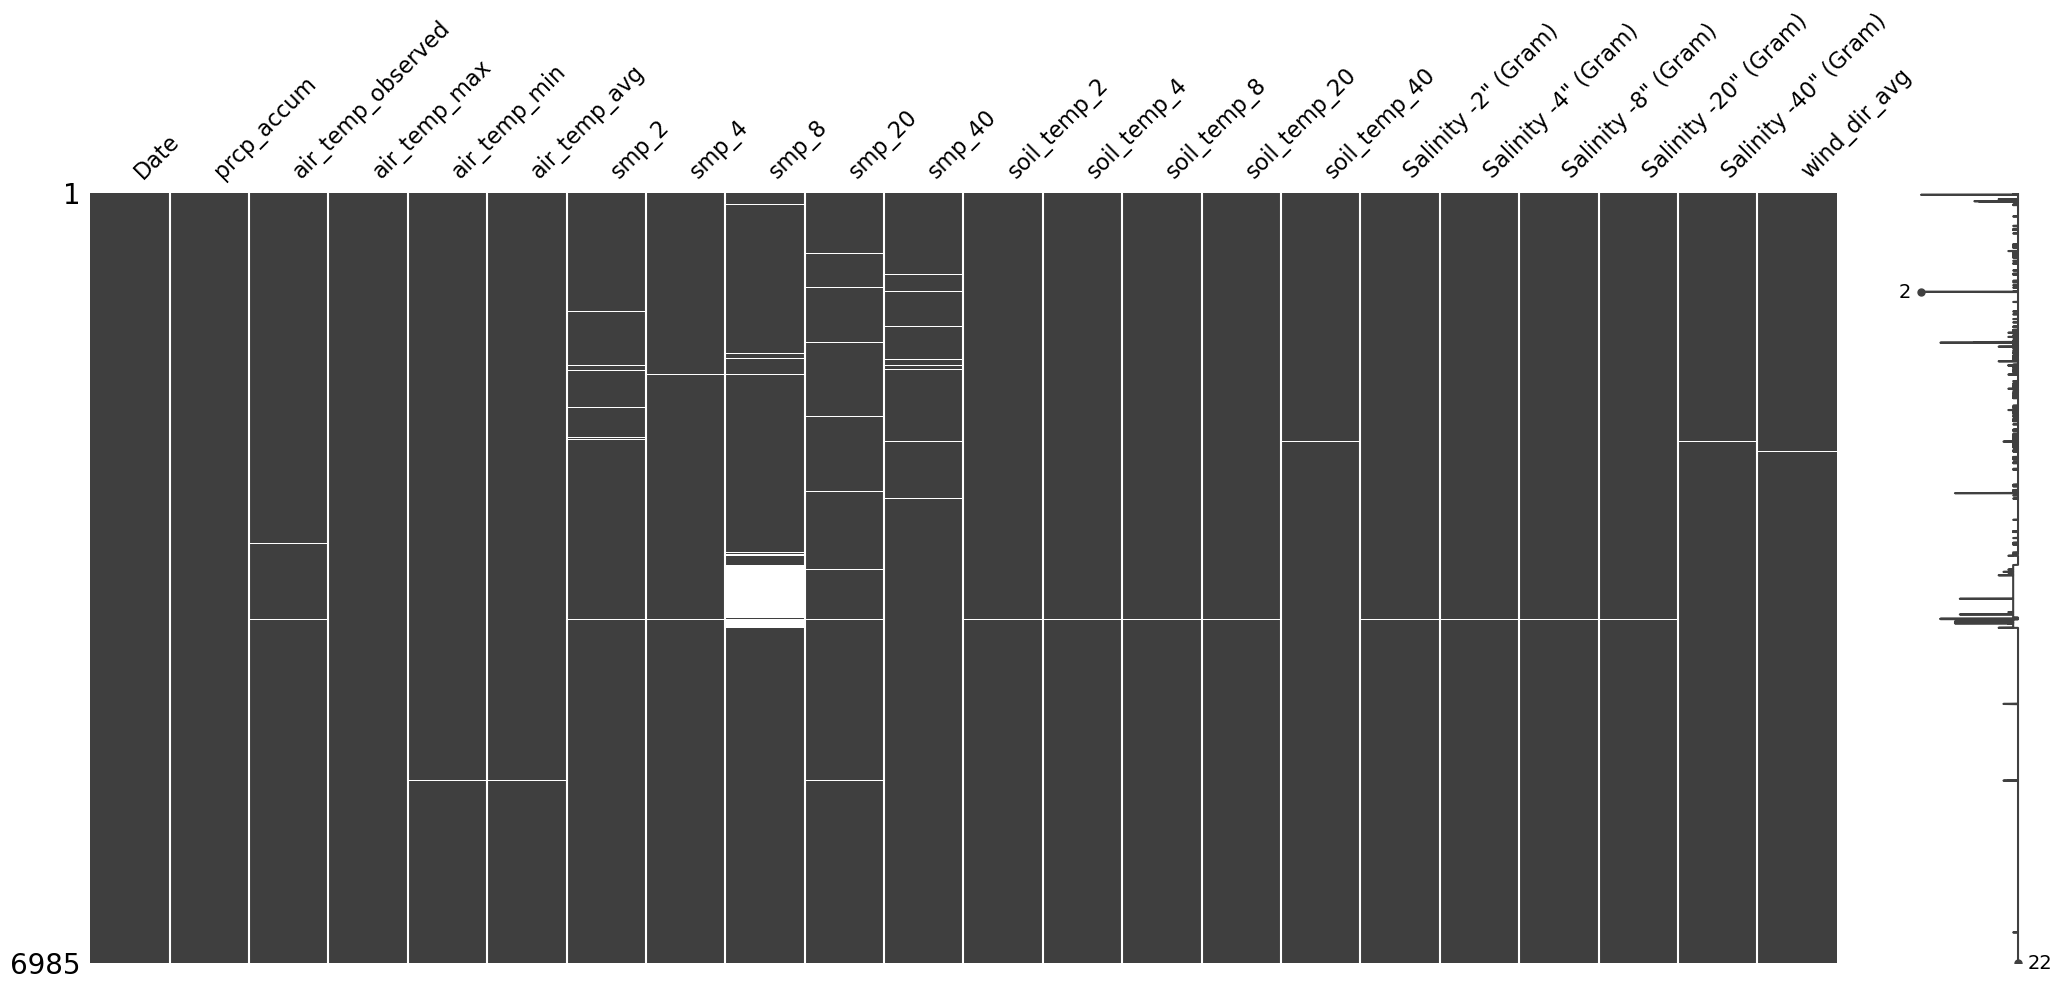

In [1291]:
msno.matrix(labeled_df.drop(labeled_df.iloc[:, 22:35], axis=1))

<AxesSubplot:>

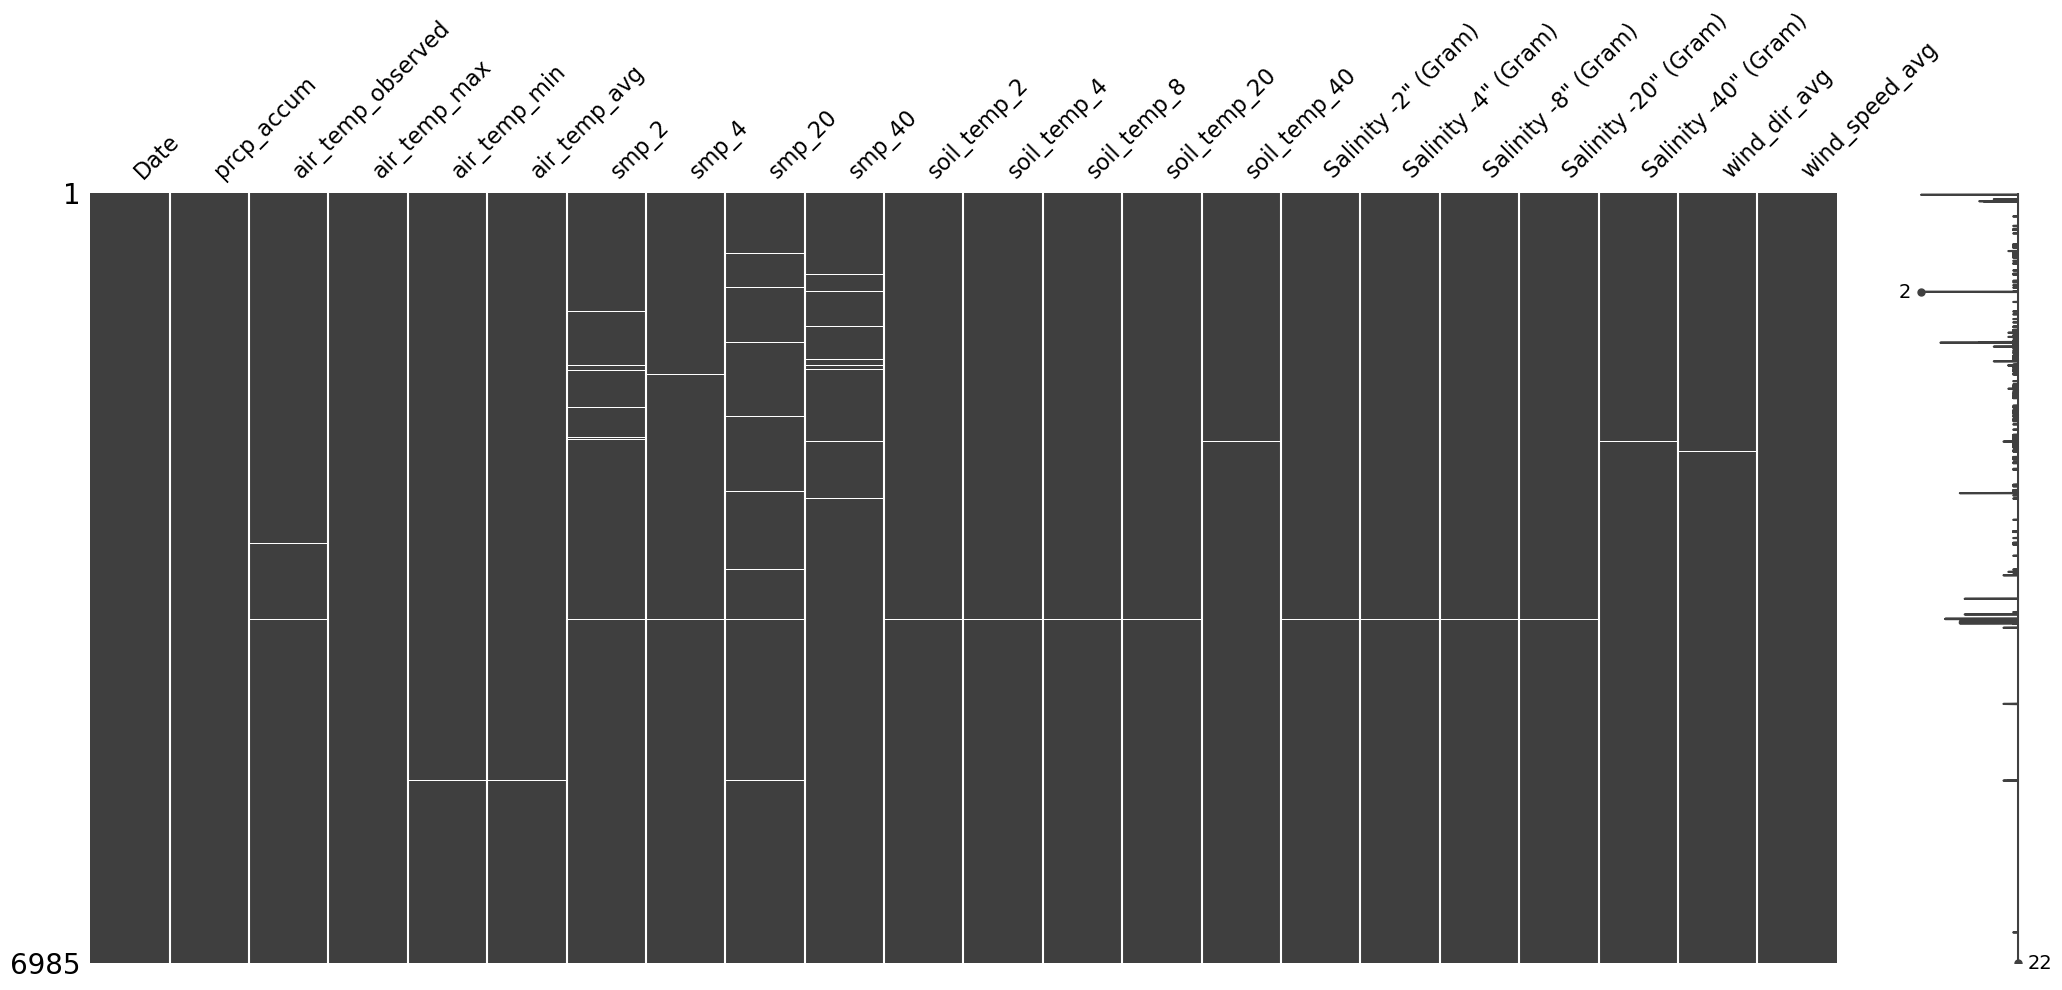

In [1292]:
labeled_df = labeled_df.drop(['smp_8'],axis=1)
msno.matrix(labeled_df.drop(labeled_df.iloc[:, 22:35], axis=1))

Create weekly groupings in the dataset to combine with dsci dataset

In [1293]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6985 entries, 2000-01-01 to 2019-12-31
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6985 non-null   object 
 1   prcp_accum            6985 non-null   float64
 2   air_temp_observed     6967 non-null   float64
 3   air_temp_max          6974 non-null   float64
 4   air_temp_min          6970 non-null   float64
 5   air_temp_avg          6972 non-null   float64
 6   smp_2                 6912 non-null   float64
 7   smp_4                 6966 non-null   float64
 8   smp_20                6884 non-null   float64
 9   smp_40                6919 non-null   float64
 10  soil_temp_2           6968 non-null   float64
 11  soil_temp_4           6967 non-null   float64
 12  soil_temp_8           6968 non-null   float64
 13  soil_temp_20          6969 non-null   float64
 14  soil_temp_40          6974 non-null   float64
 15  Sal

In [1294]:
labeled_df = labeled_df.groupby([pd.Grouper(freq='W')])[labeled_df.columns].mean()
labeled_df.head(5)

,prcp_accum,air_temp_observed,air_temp_max,air_temp_min,air_temp_avg,smp_2,smp_4,smp_20,smp_40,soil_temp_2,...,soil_temp_40,"Salinity -2"" (Gram)","Salinity -4"" (Gram)","Salinity -8"" (Gram)","Salinity -20"" (Gram)","Salinity -40"" (Gram)",wind_dir_avg,wind_speed_avg,soil_temp_avg,smp_avg
date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,4.650000,14.750000,22.750000,9.900000,15.750000,2.000000,5.700000,17.250000,25.050000,12.950000,...,14.450000,0.050000,0.050000,0.050000,0.1,0.1,164.000000,2.400000,13.640000,11.540000
2000-01-09,4.914286,10.542857,19.400000,6.414286,13.042857,1.942857,6.328571,16.800000,24.914286,10.928571,...,15.342857,0.071429,0.071429,0.085714,0.1,0.1,106.285714,4.271429,13.217143,11.802857
2000-01-16,5.600000,8.814286,20.257143,4.785714,12.428571,2.528571,7.614286,17.685714,25.114286,10.328571,...,15.385714,0.071429,0.028571,0.071429,0.1,0.1,178.857143,4.171429,13.022857,12.617143
2000-01-23,5.800000,9.433333,16.750000,5.800000,11.083333,1.283333,5.900000,17.233333,25.016667,10.583333,...,14.966667,0.050000,0.016667,0.033333,0.1,0.1,250.333333,5.550000,12.693333,11.513333
2000-01-30,7.285714,4.385714,9.442857,0.442857,4.671429,3.714286,8.300000,18.700000,25.700000,5.671429,...,13.471429,0.042857,0.014286,0.042857,0.1,0.1,186.142857,7.057143,8.922857,13.542857


In [1295]:
labeled_df = create_features(labeled_df
                    )
labeled_df.head(5)

,prcp_accum,air_temp_observed,air_temp_max,air_temp_min,air_temp_avg,smp_2,smp_4,smp_20,smp_40,soil_temp_2,...,weekday,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,week,season
date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,4.650000,14.750000,22.750000,9.900000,15.750000,2.000000,5.700000,17.250000,25.050000,12.950000,...,Sunday,1,1,2000,2,2,52,1082,52,Winter
2000-01-09,4.914286,10.542857,19.400000,6.414286,13.042857,1.942857,6.328571,16.800000,24.914286,10.928571,...,Sunday,1,1,2000,9,9,1,1089,1,Winter
2000-01-16,5.600000,8.814286,20.257143,4.785714,12.428571,2.528571,7.614286,17.685714,25.114286,10.328571,...,Sunday,1,1,2000,16,16,2,1096,2,Winter
2000-01-23,5.800000,9.433333,16.750000,5.800000,11.083333,1.283333,5.900000,17.233333,25.016667,10.583333,...,Sunday,1,1,2000,23,23,3,1103,3,Winter
2000-01-30,7.285714,4.385714,9.442857,0.442857,4.671429,3.714286,8.300000,18.700000,25.700000,5.671429,...,Sunday,1,1,2000,30,30,4,1110,4,Winter


In [1296]:
dsci_df  = dsci_df.sort_index()
dsci_df.head(5)

,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd
date,,,,,,,,
2000-01-04,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-04,2000-01-10
2000-01-11,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-11,2000-01-17
2000-01-18,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-18,2000-01-24
2000-01-25,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-25,2000-01-31
2000-02-01,0.0,100.0,100.0,100.0,0.0,0.0,2000-02-01,2000-02-07


In [1297]:
drought_cols = ['D0','D1','D2','D3','D4']
def cummulative_column(df, col_list):
    df['DSCI'] = df[col_list].sum(axis=1)
    return df

dsci_df = cummulative_column(dsci_df, drought_cols)
dsci_df.head(5)

,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,DSCI
date,,,,,,,,,
2000-01-04,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-04,2000-01-10,300.0
2000-01-11,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-11,2000-01-17,300.0
2000-01-18,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-18,2000-01-24,300.0
2000-01-25,0.0,100.0,100.0,100.0,0.0,0.0,2000-01-25,2000-01-31,300.0
2000-02-01,0.0,100.0,100.0,100.0,0.0,0.0,2000-02-01,2000-02-07,300.0


In [1298]:
dsci_df

,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,DSCI
date,,,,,,,,,
2000-01-04,0.00,100.00,100.0,100.0,0.0,0.0,2000-01-04,2000-01-10,300.00
2000-01-11,0.00,100.00,100.0,100.0,0.0,0.0,2000-01-11,2000-01-17,300.00
2000-01-18,0.00,100.00,100.0,100.0,0.0,0.0,2000-01-18,2000-01-24,300.00
2000-01-25,0.00,100.00,100.0,100.0,0.0,0.0,2000-01-25,2000-01-31,300.00
2000-02-01,0.00,100.00,100.0,100.0,0.0,0.0,2000-02-01,2000-02-07,300.00
...,...,...,...,...,...,...,...,...,...
2021-11-30,96.75,3.25,0.0,0.0,0.0,0.0,2021-11-30,2021-12-06,3.25
2021-12-07,0.00,100.00,0.0,0.0,0.0,0.0,2021-12-07,2021-12-13,100.00
2021-12-14,0.00,100.00,0.0,0.0,0.0,0.0,2021-12-14,2021-12-20,100.00


In [1299]:
dsci_df = dsci_df.drop(['ValidEnd','ValidStart', 'None'],axis=1)

In [1300]:
drought_ranges = [0,100,200,280,350,450,500]
drought_labels = ['normal','Abnormally Dry','Moderate Drought','Severe Drought','Extreme Drought','Exceptional Drought']
dsci_df['drought_status'] = pd.cut(dsci_df['DSCI'], bins=drought_ranges, labels=drought_labels, include_lowest=True)

In [1301]:
dsci_df.drought_status.value_counts()

normal                 754
Abnormally Dry         164
Severe Drought         101
Extreme Drought         65
Moderate Drought        44
Exceptional Drought     20
Name: drought_status, dtype: int64

In [1302]:
labeled_df.index.min()

Timestamp('2000-01-02 00:00:00', freq='W-SUN')

In [1303]:
dsci_df.index.min()

Timestamp('2000-01-04 00:00:00')

In [1304]:
dsci_df = dsci_df.set_index(dsci_df.index - pd.DateOffset(days=2))
dsci_df

,D0,D1,D2,D3,D4,DSCI,drought_status
date,,,,,,,
2000-01-02,100.00,100.0,100.0,0.0,0.0,300.00,Severe Drought
2000-01-09,100.00,100.0,100.0,0.0,0.0,300.00,Severe Drought
2000-01-16,100.00,100.0,100.0,0.0,0.0,300.00,Severe Drought
2000-01-23,100.00,100.0,100.0,0.0,0.0,300.00,Severe Drought
2000-01-30,100.00,100.0,100.0,0.0,0.0,300.00,Severe Drought
...,...,...,...,...,...,...,...
2021-11-28,3.25,0.0,0.0,0.0,0.0,3.25,normal
2021-12-05,100.00,0.0,0.0,0.0,0.0,100.00,normal
2021-12-12,100.00,0.0,0.0,0.0,0.0,100.00,normal


In [1305]:
merged_df = pd.merge(labeled_df, dsci_df,how='inner', left_index=True, right_index=True)
merged_df.head(5)

,prcp_accum,air_temp_observed,air_temp_max,air_temp_min,air_temp_avg,smp_2,smp_4,smp_20,smp_40,soil_temp_2,...,date_offset,week,season,D0,D1,D2,D3,D4,DSCI,drought_status
date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,4.650000,14.750000,22.750000,9.900000,15.750000,2.000000,5.700000,17.250000,25.050000,12.950000,...,1082,52,Winter,100.0,100.0,100.0,0.0,0.0,300.0,Severe Drought
2000-01-09,4.914286,10.542857,19.400000,6.414286,13.042857,1.942857,6.328571,16.800000,24.914286,10.928571,...,1089,1,Winter,100.0,100.0,100.0,0.0,0.0,300.0,Severe Drought
2000-01-16,5.600000,8.814286,20.257143,4.785714,12.428571,2.528571,7.614286,17.685714,25.114286,10.328571,...,1096,2,Winter,100.0,100.0,100.0,0.0,0.0,300.0,Severe Drought
2000-01-23,5.800000,9.433333,16.750000,5.800000,11.083333,1.283333,5.900000,17.233333,25.016667,10.583333,...,1103,3,Winter,100.0,100.0,100.0,0.0,0.0,300.0,Severe Drought
2000-01-30,7.285714,4.385714,9.442857,0.442857,4.671429,3.714286,8.300000,18.700000,25.700000,5.671429,...,1110,4,Winter,100.0,100.0,100.0,0.0,0.0,300.0,Severe Drought


In [1306]:
merged_df = merged_df.drop(['Salinity -2" (Gram)', 'Salinity -4" (Gram)','Salinity -8" (Gram)', 'Salinity -20" (Gram)', 'Salinity -40" (Gram)'],axis=1)

In [1307]:
merged_df.to_parquet('Data/Drought_Monitor_DSCI_Datasets/weekly_tift_drought_status_dsci.parquet')